In [9]:
import tensorflow as tf
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

dim1 = 400
dim2 = 500

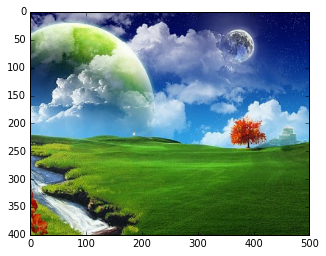

In [100]:
path = "/home/mallick/TA_summer18/exercises_ss18_ml_vision/Tutorial_01/tensor_im.jpg"
img = tf.image.decode_jpeg(tf.read_file(path), channels=3)
#img = tf.cast(tf.image.resize_images(img, [200, 200]), tf.uint8)
sess = tf.InteractiveSession()
#play around with the size
central_fraction = 0.50
img1 = tf.image.central_crop(img,central_fraction) # noisy
img3 = tf.cast(tf.image.resize_images(img, [dim1,dim2]), tf.uint8) #actual image
img2 = tf.image.resize_images(img, [dim1,dim2])

result_resize=sess.run(img1)
result_full = sess.run(img3)

#plt.imshow(result_resize)
plt.imshow(result_full)
plt.show()

In [101]:
# warp interpolators 
xcordinates =a= 100*(np.ones((dim1,dim2)))
ycordinates =b= 50*(np.ones((dim1,dim2)))
a_new = np.expand_dims(np.expand_dims(a, axis=-1),axis=0)
b_new = np.expand_dims(np.expand_dims(b, axis=-1),axis=0)
a_new.shape
total_dz = np.concatenate((a_new,b_new), axis=-1)
displacement = arg = tf.convert_to_tensor(total_dz, dtype=tf.float32)
print total_dz.shape
displacement
print sess.run(tf.rank(displacement,name='someshit'))
disp_x = tf.convert_to_tensor(xcordinates, dtype=tf.float32)

(1, 400, 500, 2)
4


In [102]:
img2[30][40]

<tf.Tensor 'strided_slice_13:0' shape=(3,) dtype=float32>

In [103]:
img2
tf.expand_dims(img2,axis=0,name='godknowswth')
displacement

<tf.Tensor 'Const_18:0' shape=(1, 400, 500, 2) dtype=float32>

In [104]:
image_new = tf.expand_dims(img2,axis=0,name='godknowswth')
flowing = tf.cast(displacement,tf.float32)




translated_result = tf.contrib.image.dense_image_warp(
    image_new,
    flowing,
    name='dense_image_warp')



In [105]:
tf_im = tf.squeeze(tf.cast(translated_result,tf.uint8))
final_im = sess.run(tf_im)
final_im

array([[[  6,  13,  85],
        [  6,  13,  85],
        [  6,  13,  85],
        ...,
        [  8,  12,  85],
        [  6,  10,  83],
        [  0,   4,  76]],

       [[  6,  13,  85],
        [  6,  13,  85],
        [  6,  13,  85],
        ...,
        [  8,  12,  85],
        [  6,  10,  83],
        [  0,   4,  76]],

       [[  6,  13,  85],
        [  6,  13,  85],
        [  6,  13,  85],
        ...,
        [  8,  12,  85],
        [  6,  10,  83],
        [  0,   4,  76]],

       ...,

       [[146, 162, 164],
        [146, 162, 164],
        [146, 162, 164],
        ...,
        [ 46,  93,  18],
        [ 47,  93,  19],
        [ 47,  93,  20]],

       [[112, 137, 140],
        [112, 137, 140],
        [112, 137, 140],
        ...,
        [ 46,  94,  20],
        [ 45,  93,  20],
        [ 43,  91,  18]],

       [[106, 141, 146],
        [106, 141, 146],
        [106, 141, 146],
        ...,
        [ 45,  95,  21],
        [ 45,  94,  22],
        [ 43,  91,  19]]

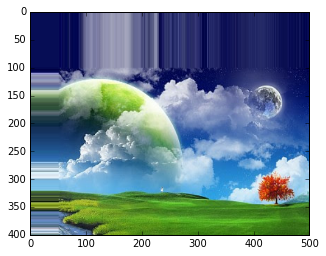

In [106]:
plt.imshow(final_im)
plt.show()

# disparity stuff 